In [68]:
import pandas as pd
df = pd.read_csv('../z20_data/drinks.csv')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [69]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [70]:
# 대륙간 국가 갯수
df['continent'].value_counts()

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

In [71]:
# AF의 맥주 소비량
df[df['continent'] == 'AF']['beer_servings'].head()

2      25
4     217
18     34
22    173
26     25
Name: beer_servings, dtype: int64

In [72]:
# 대륙간 맥주 소비량
df.groupby('continent')['beer_servings'].sum()

continent
AF    3258
AS    1630
EU    8720
OC    1435
SA    2101
Name: beer_servings, dtype: int64

In [73]:
# 대륙간 평균 wine_serving 출력
df.groupby('continent')['wine_servings'].mean()

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
SA     62.416667
Name: wine_servings, dtype: float64

In [74]:
# 상관관계 함수
corr = df[['beer_servings','wine_servings']].corr(method='pearson')
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [75]:
# 4개 모두다 상관관계, 형렬구현
cols = ['beer_servings','wine_servings','spirit_servings','total_litres_of_pure_alcohol']
df[cols].corr(method='pearson')

,beer_servings,wine_servings,spirit_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.527172,0.458819,0.835839
wine_servings,0.527172,1.000000,0.194797,0.667598
spirit_servings,0.458819,0.194797,1.000000,0.654968
total_litres_of_pure_alcohol,0.835839,0.667598,0.654968,1.000000


In [76]:
# 대륙별 맥주소비량, 평균, 최소, 최대 , 합계
df.groupby('continent')['beer_servings'].mean()
df.groupby('continent')['beer_servings'].min()
df.groupby('continent')['beer_servings'].max()
df.groupby('continent')['beer_servings'].sum()
# apply(): 함수호출 agg():그룹함수사용
df.groupby('continent').spirit_servings.agg('mean','max','min','sum')

continent
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
SA    114.750000
Name: spirit_servings, dtype: float64

In [77]:
#맥주소비량이 가장 높은 대륙
x = df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).index



In [78]:
y = df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).values

<BarContainer object of 5 artists>

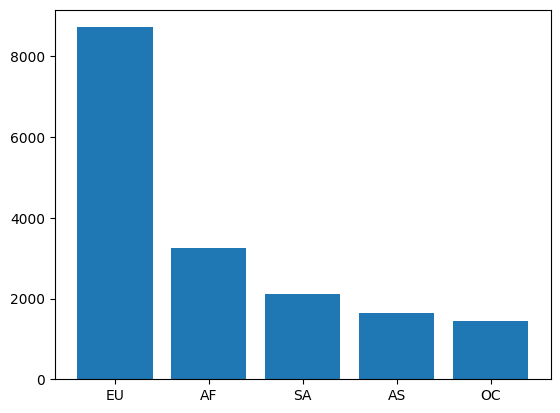

In [79]:
import matplotlib.pyplot as plt
# plt.plot(x,y)
plt.bar(x,y)

In [80]:
# AF, EU 맥주 소비량 차이
df
beer_af = df[df['continent'] == 'AF']['beer_servings'].sum()
beer_eu = df[df['continent'] == 'EU']['beer_servings'].sum()
beer_eu - beer_af

5462

In [81]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [82]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [85]:
# 컬럼의 모든 술의 총량 total_servings
df['total_servings'] = df['beer_servings']+df['spirit_servings']+df['wine_servings']
df


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


In [124]:
# 술소비량 대비 알콜비율이 어느정도 량이 되는지 
# alchol_rate 컬럼 추가해서 정렬
df['total_litres_of_pure_alcohol']/df['total_servings']
# 나라별로 역순 정렬
df['alcohol_rate'] = round((df['total_litres_of_pure_alcohol']/df['total_servings'])*100,2)
df.sort_values('alcohol_rate',ascending=False).head(20)[['country','alcohol_rate']]
x = df.sort_values('alcohol_rate',ascending=False)['country']
y = df.sort_values('alcohol_rate',ascending=False)['alcohol_rate']


<BarContainer object of 193 artists>

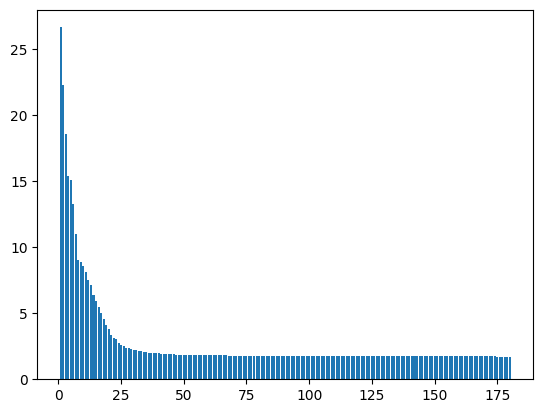

In [125]:
x = [i+1 for i in range(len(x))]
plt.bar(x,y)
